<a href="https://colab.research.google.com/github/srinijalanda93/ComputerVision/blob/main/2448526_ETE1_SET2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt

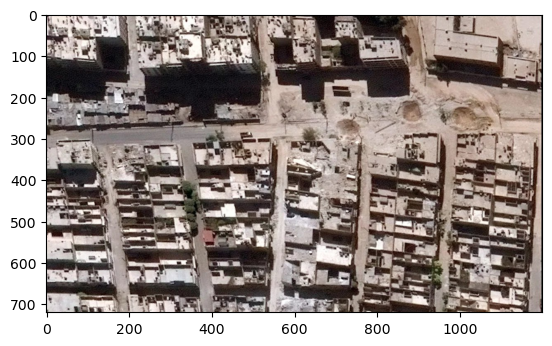

In [ ]:
#read the image
image1=plt.imread(r"C:\Users\Swapnali\Downloads\set-2-program-1.jpg")
plt.imshow(image1)

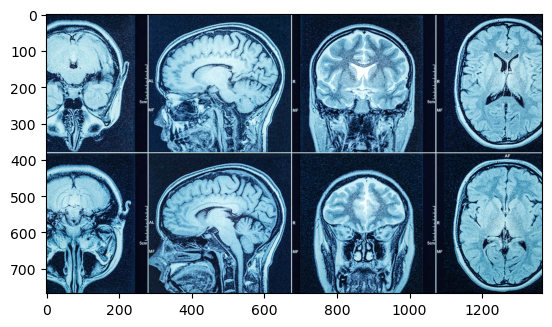

In [ ]:
#read the image
image1=plt.imread(r"C:\Users\Swapnali\Downloads\set-2-program-2.jpg")
plt.imshow(image1)

In [ ]:
'''shift all low frequency components to the center the image and display the fourier specturm''' as one function
# ''' create an ideal high pass filter with the original Image size''' as one function
'''Multiply the shifted image with create ideal high pass filter and edge detection using canny edge detection
'''Apply Inverse Fourier transforma operation to restore the image spatial domain'''

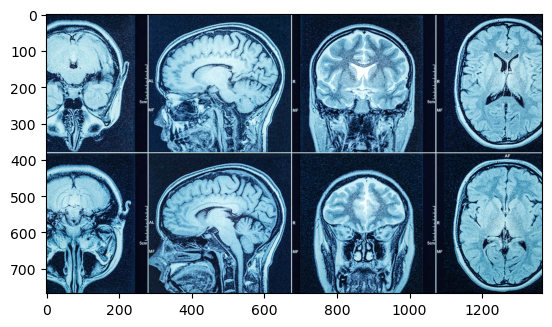

In [ ]:
#read the image
image1=plt.imread(r"C:\Users\Swapnali\Downloads\set-2-program-2.jpg")
plt.imshow(image1)

In [ ]:
# ''' create an ideal high pass filter with the original Image size''' as one function
'''Multiply the shifted image with create ideal high pass filter and edge detection using canny edge detection

In [ ]:
'''Apply Inverse Fourier transforma operation to restore the image spatial domain'''

In [ ]:
def InverseFourierTransforms (f):
    I=InverseFourierTransformation
    return I

In [ ]:
def imagedisplay(path):
    image=plt.imread(path)
    return plt.imshow(image1)

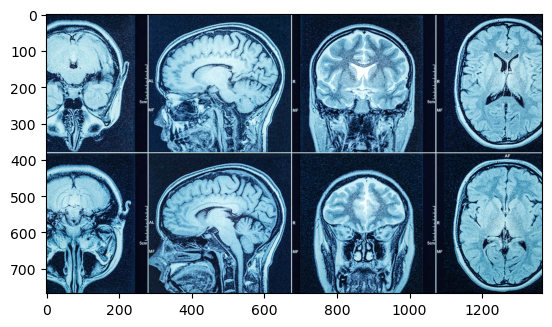

In [ ]:
imagedisplay(r"C:\Users\Swapnali\Downloads\set-2-program-2.jpg")

In [ ]:
# #program -2
# #load the given image and add the gaussian noise with different intensties in the images
# apply adapative local noise reduction filter using the following step
# 1.define window size is 3*3 or 5 by 5  or 7 by 7 and compute the local mean and local variance
# 2.display local mean value and local variance and compute the overall noise variance  by averaging all local variance
#check if the overall noise variance is > local variance then assigns local variance=overall noise variance
#find the final denoise(filter image) uisng the formula noisyimage-(total noise variance)/local variance)*(noisyimage-local mean)


In [ ]:
# imageGaussian(r"C:\Users\Swapnali\Downloads\set-2-program-2.jpg")

In [7]:
def original_Image(image):
  image1=plt.imread(image)
  plt.title("Original Image form")
  plt.imshow(image1)

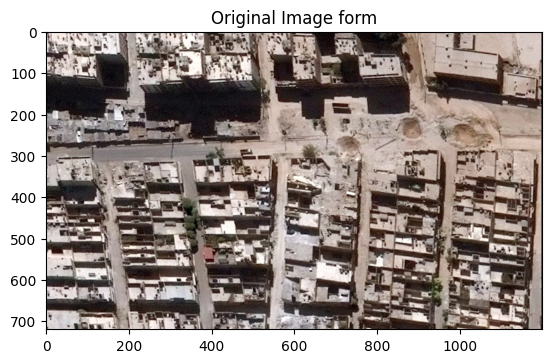

In [8]:
original_Image('/content/set-2-program-1.webp')

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



# Load image and apply 2D Fourier Transform
def apply_fourier_transform(image):
    # Apply 2D Fourier Transform to the image
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)  # Shift the zero frequency components to the center
    magnitude_spectrum = np.abs(fshift)

    # Plot the magnitude spectrum
    plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
    plt.title('Fourier Transform (Magnitude Spectrum)')
    plt.show()

    return fshift, magnitude_spectrum

#shift low-frequency components to the center
def shift_fourier(fshift):
    # Shift the low-frequency components to the center
    shifted_image = np.fft.ifftshift(fshift)

    # Plot the shifted Fourier Spectrum
    magnitude_spectrum_shifted = np.abs(shifted_image)
    plt.imshow(np.log(magnitude_spectrum_shifted + 1), cmap='gray')
    plt.title('Shifted Fourier Spectrum')
    plt.show()

    return shifted_image

# create an ideal high-pass filter
def create_high_pass_filter(image, cutoff=30):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the image

    # create a high-pass filter with a circular region
    mask = np.ones((rows, cols), np.uint8)
    r = cutoff  # Cutoff frequency
    center_x, center_y = crow, ccol
    for i in range(rows):
        for j in range(cols):
            if (i - center_x) ** 2 + (j - center_y) ** 2 < r ** 2:
                mask[i, j] = 0
    return mask

# apply the high-pass filter and perform edge detection
def apply_high_pass_filter_and_edge_detection(fshift, filter_mask):
    # apply the high-pass filter in the frequency domain
    fshift_filtered = fshift * filter_mask

    # perform inverse FFT to get the spatial domain image
    img_back = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
    img_back = np.abs(img_back)

    # apply Canny edge detection to the filtered image
    edges = cv2.Canny(np.uint8(img_back), 100, 200)

    # aisplay the edge detection results
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection (Canny)')
    plt.show()

    return img_back, edges

#  apply Inverse Fourier Transform to restore the image
def inverse_fourier_transform(fshift_filtered):
    #  FFT to reconstruct the image from the filtered frequency components
    img_back = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
    img_back = np.abs(img_back)

    plt.imshow(img_back, cmap='gray')
    plt.title('Restored Image (Inverse Fourier)')
    plt.show()

    return img_back



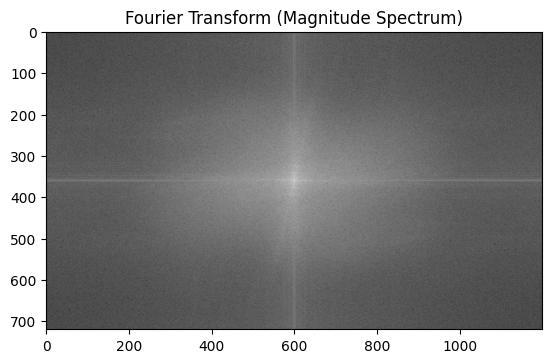

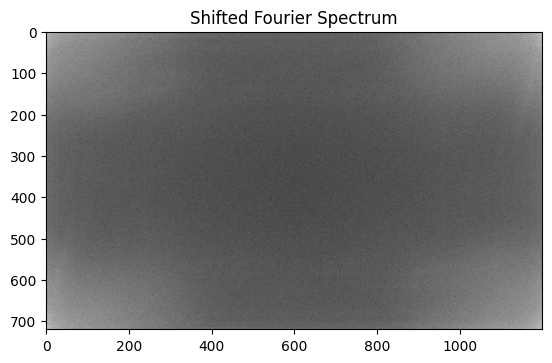

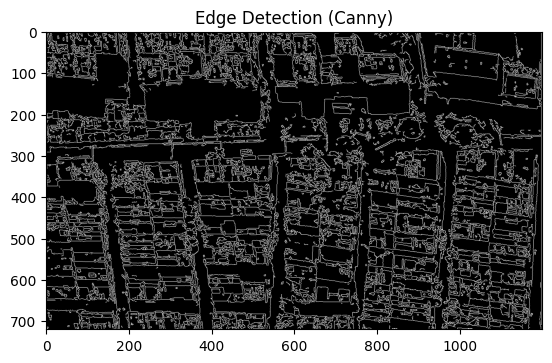

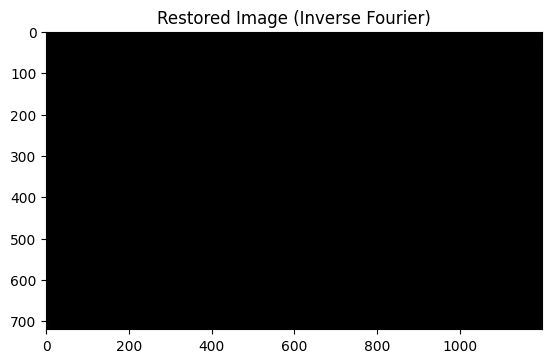

In [6]:
original_Image(r"C:\Users\Swapnali\Downloads\set-2-program-2.jpg")
image = cv2.imread(r"C:\Users\Swapnali\Downloads\set-2-program-2.jpg", 0)  # Load image in grayscale
fshift, magnitude_spectrum = apply_fourier_transform(image)
shifted_image = shift_fourier(fshift)
high_pass_filter = create_high_pass_filter(image, cutoff=30)
img_back, edges = apply_high_pass_filter_and_edge_detection(shifted_image, high_pass_filter)
inverse_image = inverse_fourier_transform(img_back)

In [14]:

def addgaussian_noise(image, mean=0, var=0.01):
    row, col = image.shape
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = np.uint8(np.clip(image + gauss * 255, 0, 255))

    # Display noisy image
    plt.imshow(noisy, cmap='gray')
    plt.title('noisy Image')
    plt.show()

    return noisy

# adaptive local noise reduction filter
def adaptive(noisy_image, window_size=3):
    # the local mean and local variance
    kernel = np.ones((window_size, window_size), np.float32) / (window_size ** 2)
    local_mean = cv2.filter2D(noisy_image, -1, kernel)
    local_variance = cv2.filter2D(np.square(noisy_image - local_mean), -1, kernel)

    #mean of all local variances
    overall_noise_variance = np.mean(local_variance)
    denoised_image = noisy_image - ((overall_noise_variance / (local_variance + 1e-6)) * (noisy_image - local_mean))

    #local mean, local variance, and denoised image
    plt.imshow(local_mean, cmap='gray')
    plt.title('local Mean')
    plt.show()
    plt.imshow(local_variance, cmap='gray')
    plt.title('local variance')
    plt.show()
    plt.imshow(denoised_image, cmap='gray')
    plt.title('denoised image')
    plt.show()

    return denoised_image



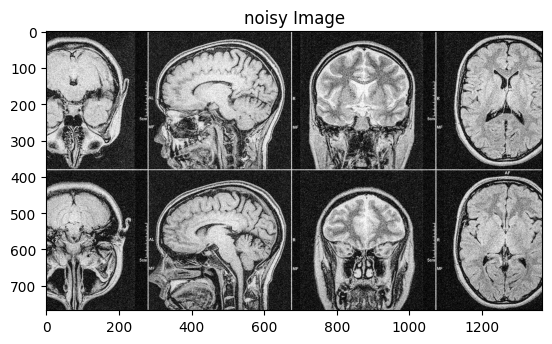

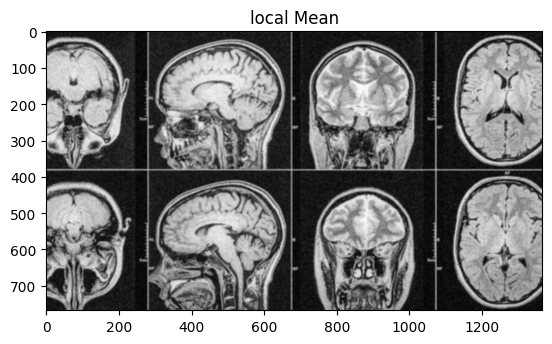

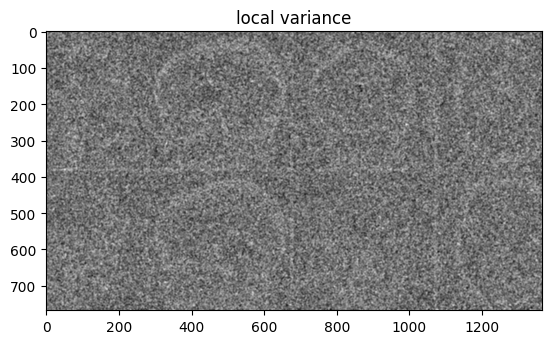

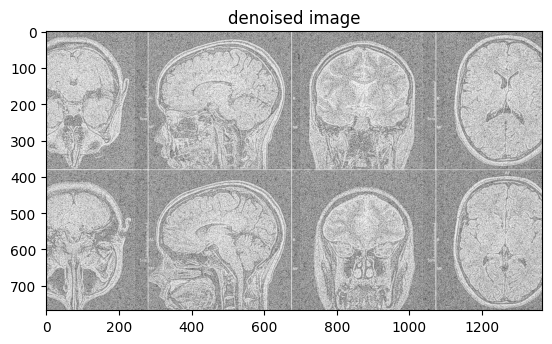

In [15]:
# program 2
image = cv2.imread(r"C:\Users\Swapnali\Downloads\set-2-program-2.jpg", 0)  # grayscale=0
noisy_image = addgaussian_noise(image, mean=0, var=0.01)
denoised_image = adaptive(noisy_image, window_size=5)